In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from dowhy import CausalModel
from IPython.display import Image, display

DoWhy is a Python Library that sparks causal thinking and analysis via 4-steps:
1. Model a causal inference problem using assumptions that we create.
2. Identify an expression for the causal effect under these assumptions (“causal estimand”).
3. Estimate the expression using statistical methods such as matching or instrumental variables.
4. Verify the validity of the estimate using a variety of robustness checks.

If we make it more simple, the way DoWhy package done Causal Analysis is by Creating Causal Model -> Identify Effect -> Estimate the Effect -> Validate.

# Hypothesis  
benign cells(no cancer) tend to have less concavity than malignant cells(cancer).
does high concaity cause diagnosis ?

In [2]:
data = pd.read_csv('../data/Univariate_feature_selection_best_5_features.csv')
data

,diagnosis,area_mean,area_se,texture_mean,concavity_worst,concavity_mean
0,M,1040.0,53.91,19.98,0.3784,0.11270
1,M,577.9,50.96,20.83,0.2678,0.09366
2,M,797.8,40.51,23.24,0.1459,0.03299
3,M,781.0,54.16,17.89,0.3965,0.09954
4,M,782.7,36.58,23.95,0.2322,0.09938
...,...,...,...,...,...,...
393,B,514.3,16.83,28.92,0.2439,0.06195
394,B,321.4,14.46,27.61,0.2000,0.05999
395,B,657.1,19.54,22.68,0.3662,0.10290
396,B,600.4,29.84,27.15,0.1326,0.04462


In [3]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [4]:
# Assigning numerical values and storing in another column
data['diagnosis'] = labelencoder.fit_transform(data['diagnosis'])
data

,diagnosis,area_mean,area_se,texture_mean,concavity_worst,concavity_mean
0,1,1040.0,53.91,19.98,0.3784,0.11270
1,1,577.9,50.96,20.83,0.2678,0.09366
2,1,797.8,40.51,23.24,0.1459,0.03299
3,1,781.0,54.16,17.89,0.3965,0.09954
4,1,782.7,36.58,23.95,0.2322,0.09938
...,...,...,...,...,...,...
393,0,514.3,16.83,28.92,0.2439,0.06195
394,0,321.4,14.46,27.61,0.2000,0.05999
395,0,657.1,19.54,22.68,0.3662,0.10290
396,0,600.4,29.84,27.15,0.1326,0.04462


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
diagnosis,398.0,0.246231,0.431357,0.000,0.000000,0.00000,0.000000,1.0000
area_mean,398.0,570.547990,222.883241,143.500,420.350000,518.30000,664.200000,1320.0000
area_se,398.0,26.512990,15.553495,6.802,16.365000,21.19500,31.307500,83.5000
texture_mean,398.0,18.505879,3.911148,9.710,15.702500,18.17500,20.755000,29.8100
concavity_worst,398.0,0.213448,0.147218,0.000,0.104825,0.18110,0.304350,0.7727
concavity_mean,398.0,0.060442,0.049068,0.000,0.025627,0.04558,0.083573,0.2545


In [7]:
data['High_concavity'] = data['concavity_mean'].apply(lambda x: True if x > 0.04558 else False)
data

,diagnosis,area_mean,area_se,texture_mean,concavity_worst,concavity_mean,High_concavity
0,1,1040.0,53.91,19.98,0.3784,0.11270,True
1,1,577.9,50.96,20.83,0.2678,0.09366,True
2,1,797.8,40.51,23.24,0.1459,0.03299,False
3,1,781.0,54.16,17.89,0.3965,0.09954,True
4,1,782.7,36.58,23.95,0.2322,0.09938,True
...,...,...,...,...,...,...,...
393,0,514.3,16.83,28.92,0.2439,0.06195,True
394,0,321.4,14.46,27.61,0.2000,0.05999,True
395,0,657.1,19.54,22.68,0.3662,0.10290,True
396,0,600.4,29.84,27.15,0.1326,0.04462,False


In [21]:
xs = data.iloc[:,1:6].columns.tolist()
xs

['area_mean', 'area_se', 'texture_mean', 'concavity_worst', 'concavity_mean']

In [24]:
model=CausalModel(
        data = data,
        treatment='High_concavity',
        outcome='diagnosis',
        common_causes=xs
        )

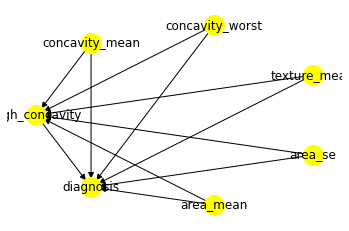

In [25]:
model.view_model()

In [26]:
#Identify the causal effect
estimands = model.identify_effect()
print(estimands)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                                                     
─────────────────(Expectation(diagnosis|area_mean,texture_mean,area_se,concavi
d[High_concavity]                                                             

                         
ty_worst,concavity_mean))
                         
Estimand assumption 1, Unconfoundedness: If U→{High_concavity} and U→diagnosis then P(diagnosis|High_concavity,area_mean,texture_mean,area_se,concavity_worst,concavity_mean,U) = P(diagnosis|High_concavity,area_mean,texture_mean,area_se,concavity_worst,concavity_mean)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand name: frontdoor
No such variable found!



In [29]:
#Causal Effect Estimation
estimate = model.estimate_effect(estimands,method_name = "backdoor.propensity_score_weighting")
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                                                     
─────────────────(Expectation(diagnosis|area_mean,texture_mean,area_se,concavi
d[High_concavity]                                                             

                         
ty_worst,concavity_mean))
                         
Estimand assumption 1, Unconfoundedness: If U→{High_concavity} and U→diagnosis then P(diagnosis|High_concavity,area_mean,texture_mean,area_se,concavity_worst,concavity_mean,U) = P(diagnosis|High_concavity,area_mean,texture_mean,area_se,concavity_worst,concavity_mean)

## Realized estimand
b: diagnosis~High_concavity+area_mean+texture_mean+area_se+concavity_worst+concavity_mean
Target units: ate

## Estimate
Mean value: 0.21643523368321704



 the probability of M is 21% when the the cell has a high concavity.

# Random Common Cause 
add an independent random variable as a common cause to the dataset; If the assumption was correct, the estimation should not change.

In [30]:
refutel = model.refute_estimate(estimands,estimate, "random_common_cause")
print(refutel)

Refute: Add a Random Common Cause
Estimated effect:0.21643523368321704
New effect:0.21307057874207494



In [32]:
refutel = model.refute_estimate(estimands,estimate, "data_subset_refuter")
print(refutel)

Refute: Use a subset of data
Estimated effect:0.21643523368321704
New effect:0.2127086733750294
p value:0.4



In [33]:
refutel = model.refute_estimate(estimands,estimate, "placebo_treatment_refuter")
print(refutel)

Refute: Use a Placebo Treatment
Estimated effect:0.21643523368321704
New effect:-0.0009886078757307991
p value:0.47



Inference

 a high compactness mean has a causal effect on the breast cancer diagnosis

In [31]:
def jaccard_similarity(g, h):
    i = set(g).intersection(h)
    return round(len(i) / (len(g) + len(h) - len(i)),3)

In [ ]:
# function that takes the dataframe and plotes the graph 
# input df , outcome, treatment, 
# if outcome and treatment = 
#xs
#model 


In [46]:
def causal_graph(df,treatment:str,outcome:str):
    if treatment== df.treatment and outcome == df.outcome :
        xs = df.drop([treatment,outcome], axis = 1)
        
    return  xs 


NameError: name 'dataframe' is not defined

In [41]:
def dowhy_model(df:Dataframe,treatment: str,outcome:str):
    xs = causal_graph(df,treatment,outcome)
    model=CausalModel(
        data = data,
        treatment=treatment,
        outcome=outcome,
        common_causes=xs
        )
    model.view_model()
    display(Image(filename="../images/causal_model.png"))
    estimands = model.identify_effect() 
    print(estimands)
    estimate = model.estimate_effect(estimands,method_name = "backdoor.propensity_score_weighting")
    print(estimate)
    refutel1 = model.refute_estimate(estimands,estimate, "random_common_cause")
    print(refutel1)
    refutel2 = model.refute_estimate(estimands,estimate, "data_subset_refuter")
    print(refutel2)
    refutel3 = model.refute_estimate(estimands,estimate, "placebo_treatment_refuter")
    print(refutel3)
    return 

    

In [43]:
dowhy_model(data,'concavity_mean','diagnosis')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().